In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [3]:
uni = pd.read_csv("Universities.csv")


In [4]:
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [5]:
uni.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [6]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [7]:
# Considering only numerical data 
uni.data = uni.iloc[:,1:]
uni.data.head()
#converting numpy into array
#UNI=uni.data.values


<ipython-input-7-5ae3381deac7>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  uni.data = uni.iloc[:,1:]


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [8]:
# Converting into numpy array
UNI = uni.data.values
UNI

array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

In [9]:
# Normalizing the numerical data 
uni_normal = scale(UNI)

In [10]:
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [15]:
pd.DataFrame(uni_normal)

,0,1,2,3,4,5
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


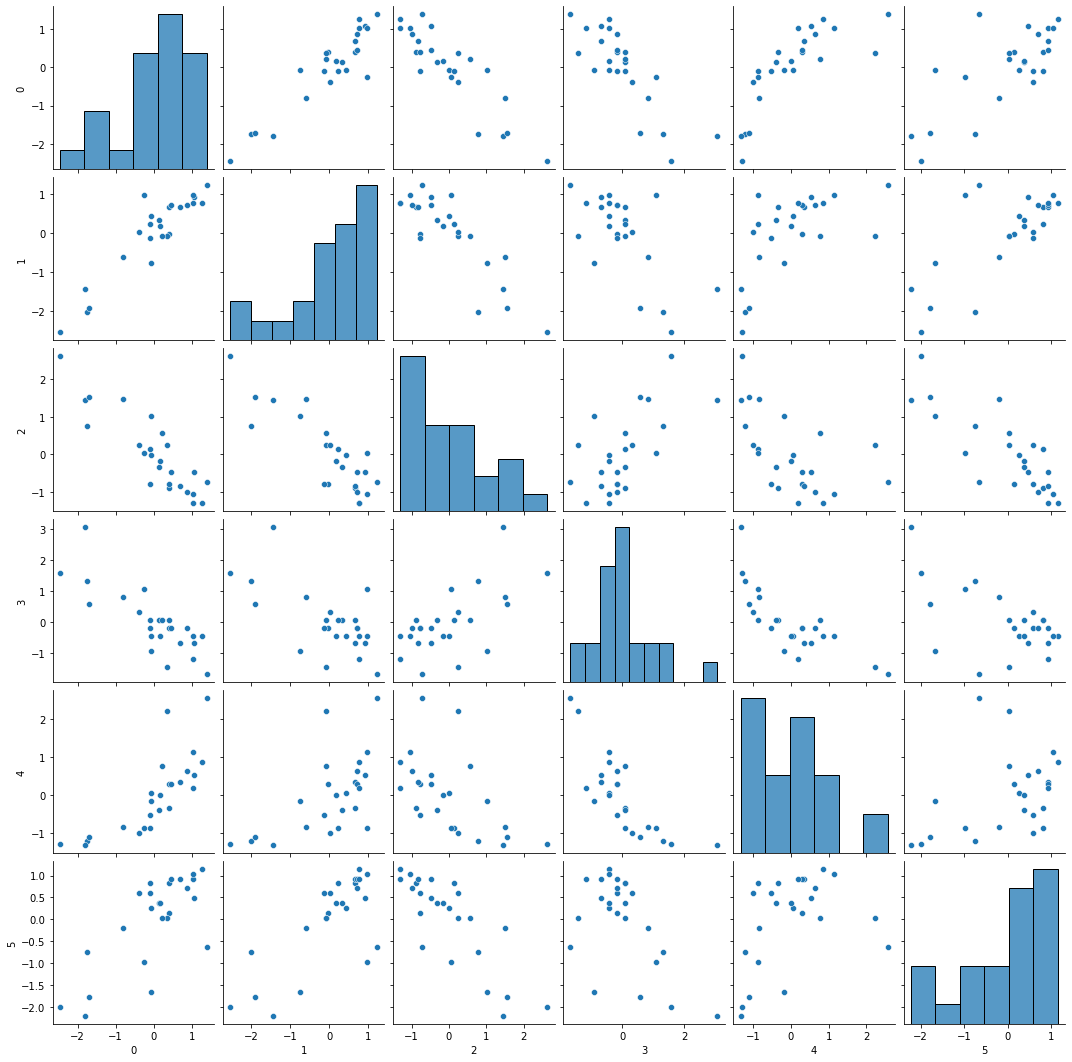

In [29]:
import seaborn as sns
sns.pairplot(pd.DataFrame(uni_normal))

In [11]:
pca = PCA()
pca_values = pca.fit_transform(uni_normal)

In [12]:
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [16]:
pd.DataFrame(pca_values)

,0,1,2,3,4,5
0,-1.009874,-1.064310,0.081066,0.056951,-0.128754,-0.034650
1,-2.822238,2.259045,0.836829,0.143845,-0.125962,-0.180703
2,1.112466,1.631209,-0.266787,1.075075,-0.191814,0.345679
3,-0.741741,-0.042187,0.060501,-0.157208,-0.577611,0.109163
4,-0.311912,-0.635244,0.010241,0.171364,0.012726,-0.016921
5,-1.696691,-0.344363,-0.253408,0.012564,-0.052661,-0.027166
6,-1.246821,-0.490984,-0.032094,-0.205644,0.293505,-0.078012
7,-0.338750,-0.785169,-0.493585,0.039856,-0.544979,-0.155372
8,-2.374150,-0.386539,0.116098,-0.453366,-0.230108,0.266984
9,-1.403277,2.119515,-0.442827,-0.632543,0.230054,-0.235615


In [17]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(uni_normal)

In [18]:
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [19]:
pd.DataFrame(pca_values)

,0,1,2,3,4,5
0,-1.009874,-1.064310,0.081066,0.056951,-0.128754,-0.034650
1,-2.822238,2.259045,0.836829,0.143845,-0.125962,-0.180703
2,1.112466,1.631209,-0.266787,1.075075,-0.191814,0.345679
3,-0.741741,-0.042187,0.060501,-0.157208,-0.577611,0.109163
4,-0.311912,-0.635244,0.010241,0.171364,0.012726,-0.016921
5,-1.696691,-0.344363,-0.253408,0.012564,-0.052661,-0.027166
6,-1.246821,-0.490984,-0.032094,-0.205644,0.293505,-0.078012
7,-0.338750,-0.785169,-0.493585,0.039856,-0.544979,-0.155372
8,-2.374150,-0.386539,0.116098,-0.453366,-0.230108,0.266984
9,-1.403277,2.119515,-0.442827,-0.632543,0.230054,-0.235615


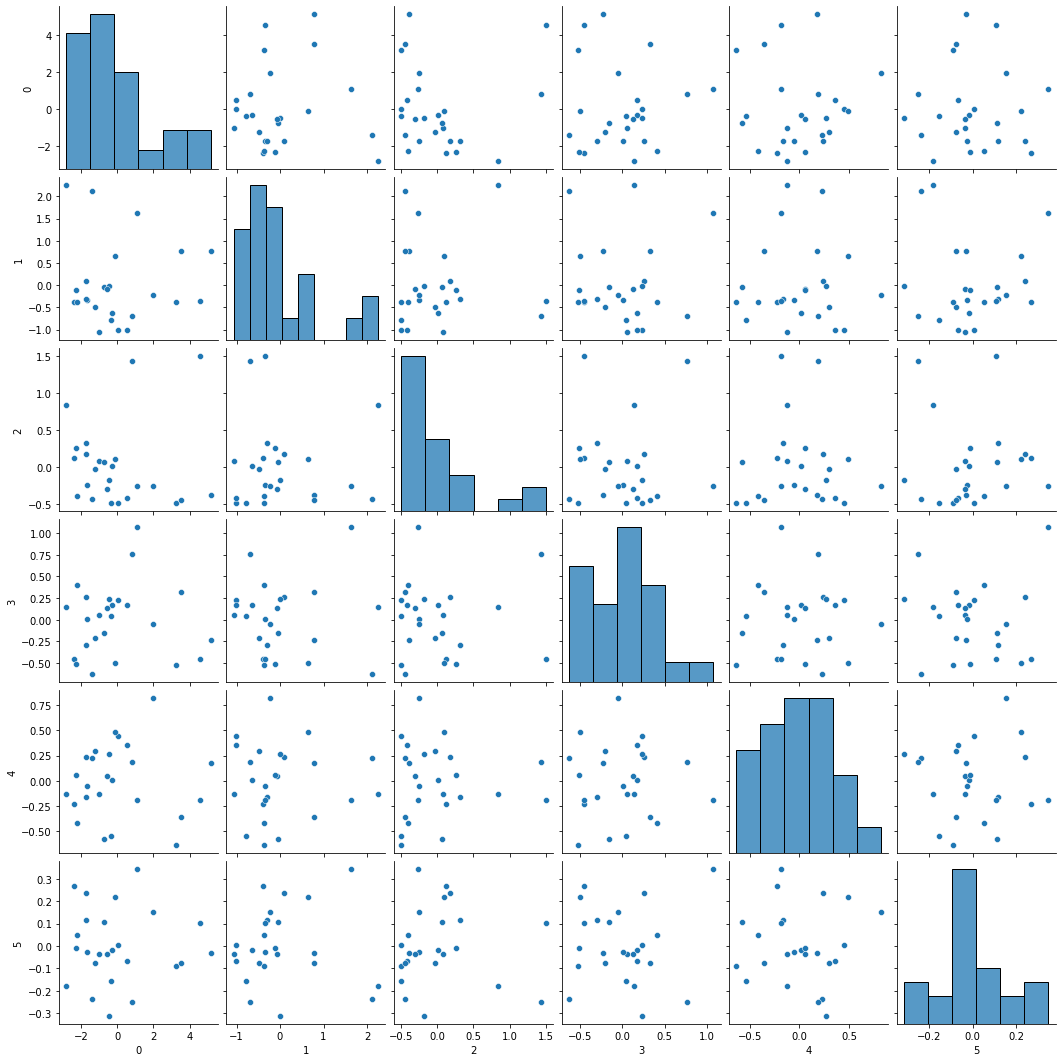

In [30]:
import seaborn as sns
sns.pairplot(pd.DataFrame(pca_values))

In [20]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [21]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

In [22]:
pca.components_

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

In [31]:
pd.DataFrame(pca_values).corr()

,0,1,2,3,4,5
0,1.000000e+00,-1.282176e-17,1.931445e-17,-7.153507e-17,-4.105568e-17,-4.648785e-17
1,-1.282176e-17,1.000000e+00,-5.260741e-18,-1.701005e-17,1.514293e-16,-4.423901e-16
2,1.931445e-17,-5.260741e-18,1.000000e+00,-2.203631e-16,2.375020e-16,9.862982e-17
3,-7.153507e-17,-1.701005e-17,-2.203631e-16,1.000000e+00,1.964693e-16,1.512842e-16
4,-4.105568e-17,1.514293e-16,2.375020e-16,1.964693e-16,1.000000e+00,-7.321182e-17
5,-4.648785e-17,-4.423901e-16,9.862982e-17,1.512842e-16,-7.321182e-17,1.000000e+00


In [32]:
weights=pd.DataFrame(pca.components_)
((weights.iloc[:,5])**2).sum()

1.0

In [33]:
weights

,0,1,2,3,4,5
0,-0.457749,-0.427144,0.424308,0.390648,-0.362523,-0.379404
1,0.039680,-0.199932,0.320893,-0.432564,0.634486,-0.515554
2,0.187039,0.497809,-0.156279,0.606081,0.204741,-0.532473
3,0.131240,0.374896,0.061287,-0.507391,-0.623401,-0.438633
4,0.020646,0.482016,0.801094,0.076824,0.072548,0.338110
5,0.858055,-0.396075,0.216934,0.172048,-0.173763,-0.003538


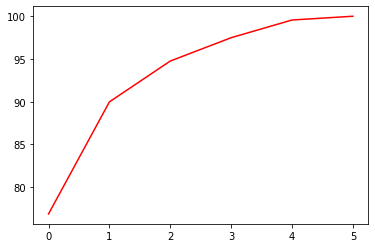

In [23]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [24]:
 pca_values[:,0:1]

array([[-1.00987445],
       [-2.82223781],
       [ 1.11246577],
       [-0.74174122],
       [-0.31191206],
       [-1.69669089],
       [-1.24682093],
       [-0.33874978],
       [-2.37415013],
       [-1.40327739],
       [-1.72610332],
       [-0.45085748],
       [ 0.04023814],
       [ 3.23373034],
       [-2.23626502],
       [ 5.17299212],
       [-1.69964377],
       [ 4.578146  ],
       [ 0.82260312],
       [-0.09776213],
       [ 1.9631826 ],
       [-0.54228894],
       [ 0.53222092],
       [ 3.54869664],
       [-2.30590032]])

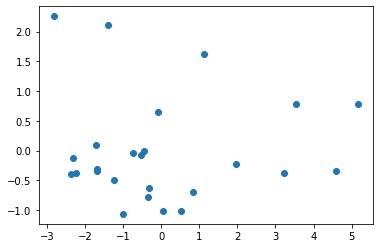

In [25]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [26]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), uni[['Univ']]], axis = 1)

In [27]:
finalDf

,pc1,pc2,Univ
0,-1.009874,-1.064310,Brown
1,-2.822238,2.259045,CalTech
2,1.112466,1.631209,CMU
3,-0.741741,-0.042187,Columbia
4,-0.311912,-0.635244,Cornell
5,-1.696691,-0.344363,Dartmouth
6,-1.246821,-0.490984,Duke
7,-0.338750,-0.785169,Georgetown
8,-2.374150,-0.386539,Harvard
9,-1.403277,2.119515,JohnsHopkins


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

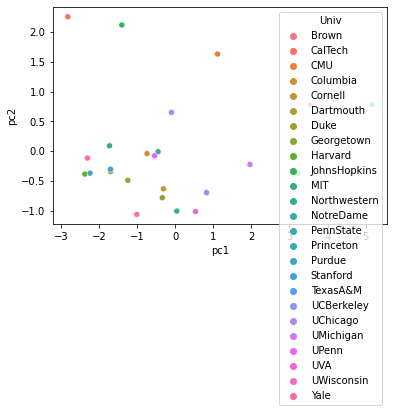

In [28]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Univ')